In [122]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA

In [123]:
m=500
N=2000

In [124]:
A=np.random.rand(m,N) # measurement matrix
s=2 # sparsity

x =np.zeros((N,1))


In [125]:
import random
randomlist = random.sample(range(0, N-1), 2)
print(randomlist)  # indeces for non zero values

[495, 274]


In [126]:
from random import random

for i in randomlist:
    x[i]=random()  

y=A.dot(x)  

xn=np.zeros((N,1))
xn1=np.zeros((N,1)) #xn+1

In [127]:
def hard_thresh(x_mat,s):  # function for hard thresholding
    n=len(x_mat)
    val=[]
    
    x_mat_temp=np.array
    x_mat_temp=np.absolute(x_mat)
    ind=x_mat_temp.argsort(axis=0)
    
    val=ind[-s:]
    
    for i in range(n):
        if i not in val:
            x_mat[i]=0
        
             
    return(x_mat)

In [128]:
def iht_algo (A,y,s,h,max_iter,tol,xn):
    iteration=0
    rel_inc=[]
    residual=[]
    rel_incr=10
    xn1=np.zeros((N,1)) #xn+1
    
    while iteration<max_iter and rel_incr>tol:
        A_tol=A.transpose()
        xn1=xn+(h*(A_tol.dot((y-(A.dot(xn))))))
        xn1=hard_thresh(xn1,s)
        
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1)
        rel_inc.append(rel_incr)
        
        residual.append(LA.norm((A.dot(xn1))-y))
        
        iteration=iteration+1
        
        xn=xn1
           
    return xn,rel_inc,residual,iteration    

In [129]:
xnplus1,rel_inc,residual,iters=iht_algo(A,y,s,0.001,1000,0.000001,xn)

In [130]:
iters

123

In [131]:
for i in randomlist:  # compare values of x and xn1 after final iteration
    print(i)
    print(xnplus1[i])
    print(x[i])
    print("_____________")

495
[0.28469551]
[0.28468795]
_____________
274
[0.29640734]
[0.29641463]
_____________


In [134]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Residual')

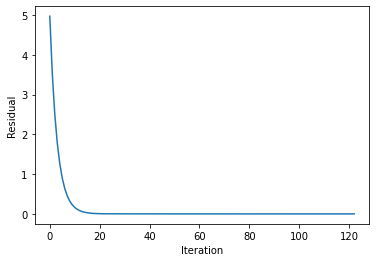

In [135]:
plt.plot(residual)  # plot of residual for each iteration
plt.xlabel("Iteration")
plt.ylabel("Residual")
#plt.yscale('log')

Text(0, 0.5, 'Relative increment')

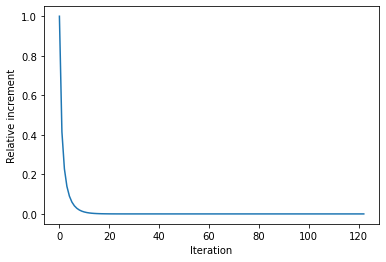

In [136]:
plt.plot(rel_inc)  # plot of relative increment for each iteration
plt.xlabel("Iteration")
plt.ylabel("Relative increment")
#plt.yscale('log')